# Dimensionality reduction and PCA

## 1. Discuss curse of dimensionality

The Curse of Dimensionality is termed by mathematician R. Bellman in his book “Dynamic Programming” in 1957. According to him, the curse of dimensionality is the problem caused by the exponential increase in volume associated with adding extra dimensions to Euclidean space.  

The curse of dimensionality basically means that the error increases with the increase in the number of features. It refers to the fact that algorithms are harder to design in high dimensions and often have a running time exponential in the dimensions. A higher number of dimensions theoretically allow more information to be stored, but practically it rarely helps due to the higher possibility of noise and redundancy in the real-world data.

Gathering a huge number of data may lead to the dimensionality problem where highly noisy dimensions with fewer pieces of information and without significant benefit can be obtained due to the large data. The exploding nature of spatial volume is at the forefront is the reason for the curse of dimensionality.

## 2. Discuss any 3 dimensionality reduction techniques

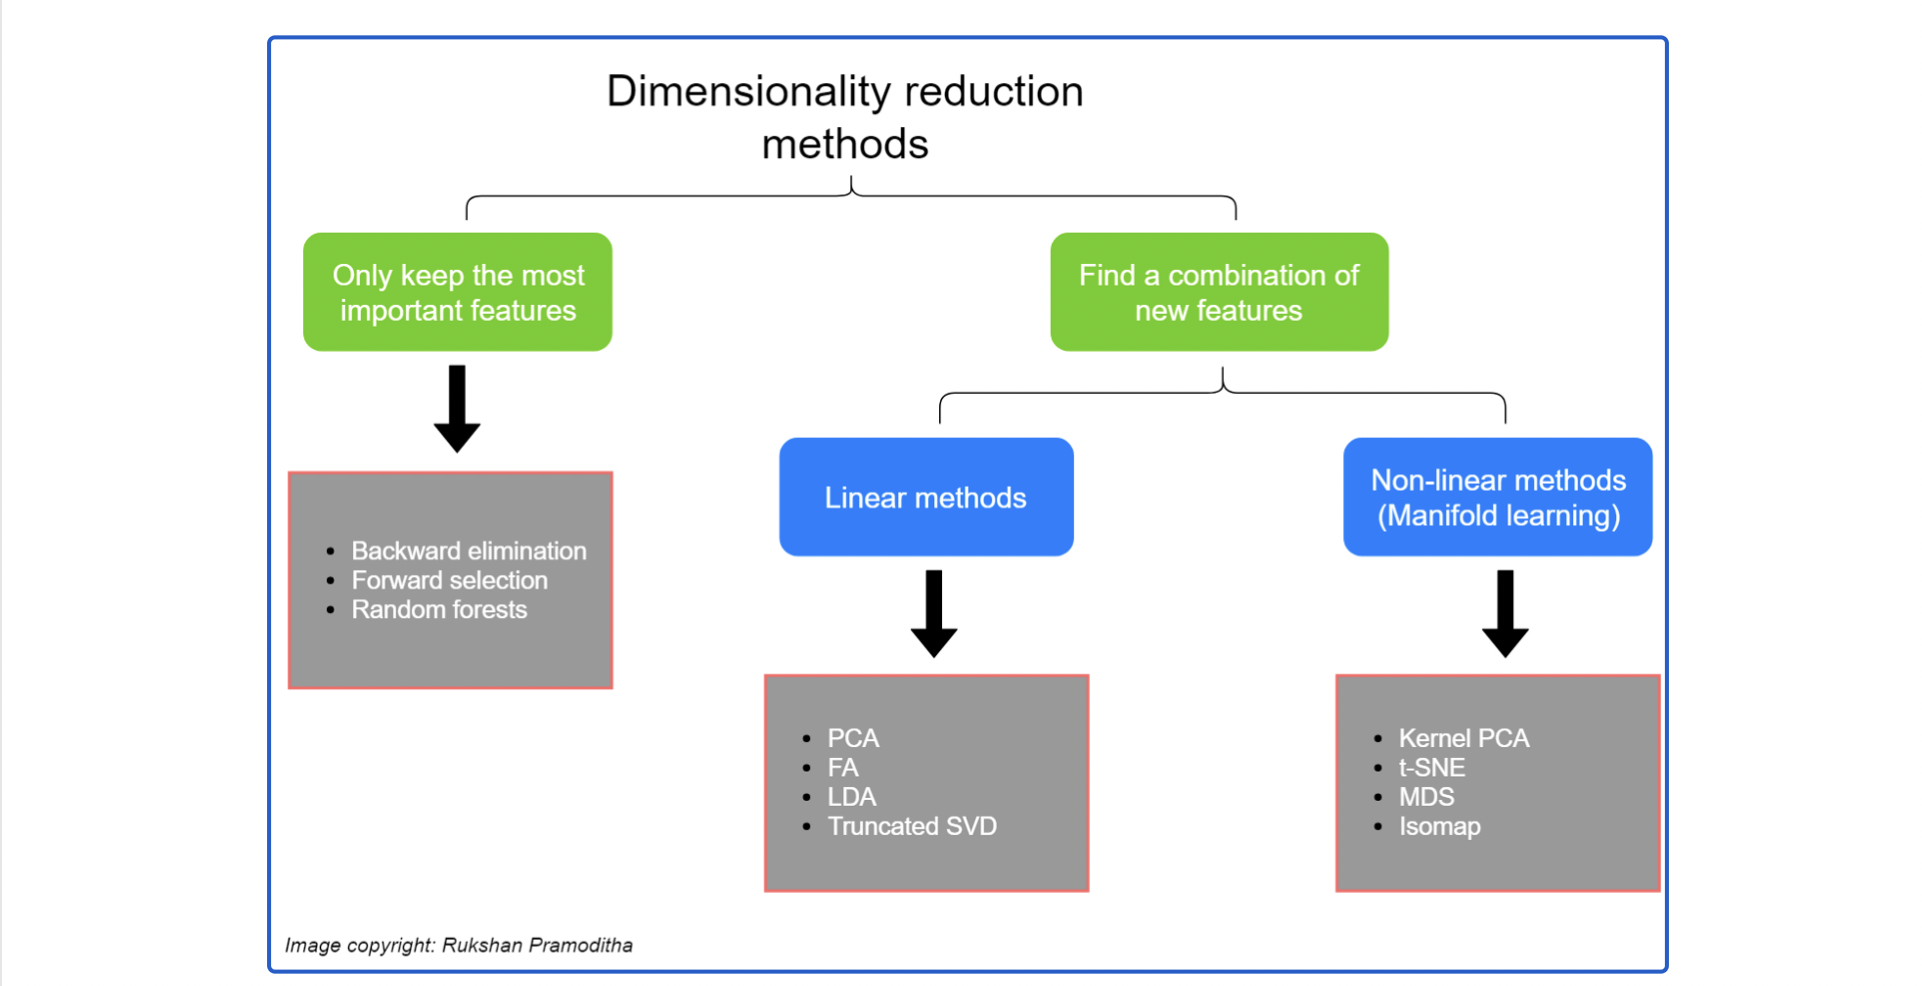

Dimensionality reduction can be done in two different ways:

- By only keeping the most relevant variables from the original dataset (this technique is called feature selection)
- By finding a smaller set of new variables, each being a combination of the input variables, containing basically the same information as the input variables (this technique is called dimensionality reduction)

### Linear Discriminant Analysis (LDA)

LDA best separates or discriminates training instances by their classes. The major difference between LDA and PCA is that LDA finds a linear combination of input features that optimizes class separability while PCA attempts to find a set of uncorrelated components of maximum variance in a dataset. Another key difference between the two is that PCA is an unsupervised algorithm whereas LDA is a supervised algorithm where it takes class labels into account.

There are some limitations of LDA. To apply LDA, the data should be normally distributed. The dataset should also contain known class labels. The maximum number of components that LDA can find is the number of classes minus 1. If there are only 3 class labels in your dataset, LDA can find only 2 (3–1) components in dimensionality reduction. It is not needed to perform feature scaling to apply LDA. On the other hand, PCA needs scaled data. However, class labels are not needed for PCA. The maximum number of components that PCA can find is the number of input features in the original dataset.

### Kernel PCA

Kernel PCA is a non-linear dimensionality reduction technique that uses kernels. It can also be considered as the non-linear form of normal PCA. Kernel PCA works well with non-linear datasets where normal PCA cannot be used efficiently.
The intuition behind Kernel PCA is something interesting. The data is first run through a kernel function and temporarily projects them into a new higher-dimensional feature space where the classes become linearly separable (classes can be divided by drawing a straight line). Then the algorithm uses the normal PCA to project the data back onto a lower-dimensional space. In this way, Kernel PCA transforms non-linear data into a lower-dimensional space of data which can be used with linear classifiers.

In the Kernel PCA, we need to specify 3 important hyperparameters — the number of components we want to keep, the type of kernel and the kernel coefficient (also known as the gamma). For the type of kernel, we can use ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’. The rbf kernel which is known as the radial basis function kernel is the most popular one.

### Backward Elimination

This method eliminates (removes) features from a dataset through a recursive feature elimination (RFE) process. The algorithm first attempts to train the model on the initial set of features in the dataset and calculates the performance of the model (usually, accuracy score for a classification model and RMSE for a regression model). Then, the algorithm drops one feature (variable) at a time, trains the model on the remaining features and calculates the performance scores. The algorithm repeats eliminating features until it detects a small (or no) change in the performance score of the model and stops there.

In the Scikit-learn, backward elimination can be implemented by using the RFE() class which is in the sklearn.feature_selection module. The first parameter of that class should be a supervised learning estimator with a fit() method and a coef_ or feature_importances_ attribute. The second one should be the number of features to select. According to the Scikit-learn documentation, half of the features are selected if we do not specify the number of features to select (n_features_to_select parameter). A major limitation of this method is that we do not know the number of features to select. In those situations, it is better to run this algorithm multiple times by specifying different values for n_features_to_select.

## 3. Explain PCA in your own words

The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent. The same is done by transforming the variables to a new set of variables, which are known as the principal components (or simply, the PCs) and are orthogonal, ordered such that the retention of variation present in the original variables decreases as we move down in the order. So, in this way, the 1st principal component retains maximum variation that was present in the original components. The principal components are the eigenvectors of a covariance matrix, and hence they are orthogonal.

Steps to perform PCA

1. Normalize the data

2. Calculate the covariance matrix

3. Calculate the eigenvalues and eigenvectors

4. Choosing components and forming a feature vector

5. Forming Principal Components

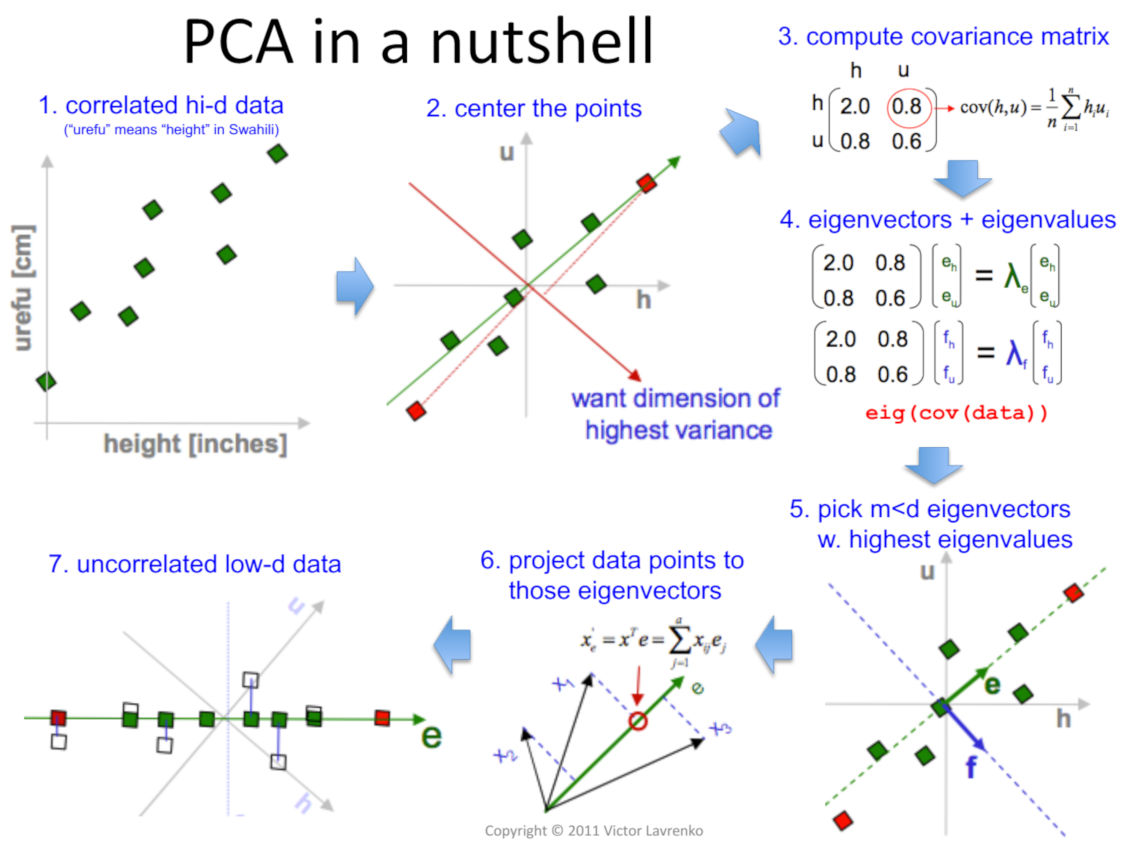

## 4. Perform classification on wine dataset using any model of your choice using all the features

In [116]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.datasets import load_wine
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [117]:
df = datasets.load_wine(return_X_y = False, as_frame = True)

In [118]:
wine_df = df.data
wine_df['target'] = df.target

In [119]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [120]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [121]:
# getting the independent and dependent variables
X = wine_df.iloc[:,0:13].values
y = wine_df.iloc[:,13].values

In [122]:
# scaling the dataset
x = StandardScaler().fit_transform(X)

In [123]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


In [124]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [125]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [126]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


## 5. Perform classification on wine dataset using PCA and taking all top components such that 90% variance is explained by them

In [127]:
# applying PCA
# If 0 < n_components < 1 and svd_solver == 'full',select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
pca = PCA(n_components = 0.9)

In [128]:
principalComponents = pca.fit_transform(x)

In [129]:
principalDf = pd.DataFrame(data = principalComponents)

In [130]:
# creating the final dataframe with the principal components and the target variable
finalDf = pd.concat([principalDf, wine_df[['target']]], axis = 1)

In [131]:
wine_df['target'].unique()

array([0, 1, 2])

In [132]:
# explained variance by the top components such that 90% variance is explained by them 
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749])

In [133]:
pca.explained_variance_ratio_.sum()

0.9201754434577263

In [134]:
finalDf.head()

,0,1,2,3,4,5,6,7,target
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0


In [135]:
finalDf.drop('target',axis = 1)

,0,1,2,3,4,5,6,7
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700
...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829


In [136]:
X_train_top,X_test_top,y_train_top,y_test_top=train_test_split(finalDf.drop('target',axis = 1),finalDf['target'],test_size=0.3,random_state=42)
print(X_train_top.shape)
print(X_test_top.shape)
print(y_train_top.shape)
print(y_test_top.shape)

(124, 8)
(54, 8)
(124,)
(54,)


In [137]:
model_top = RandomForestClassifier()

In [138]:
model_top.fit(X_train_top, y_train_top)
y_pred_top = model_top.predict(X_test_top)

In [139]:
print("Accuracy:",metrics.accuracy_score(y_test_top, y_pred_top))

Accuracy: 0.9629629629629629


## 6. Discuss the difference in results vs difference in number of features used for classification.

1. Accuracy decreased from 1 to 0.96 due to Principle component analysis
2. First all 13 features were used to predict the target variable whereas in PCA, only 8 components were used. This means that 13 dimensions were reduced to 8 dimensions using PCA when 90 % variance was specified.

### Reference:

https://analyticsindiamag.com/curse-of-dimensionality-and-what-beginners-should-do-to-overcome-it/

https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b

https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

https://krishnaik.in/2022/03/05/day-3-data-science-interview-prepartion/